- 차원 축소 (2,5,10)
- 분류 정확도 : 원본, 2, 5, 10
- 2차원데이터만 시각화
- 군집화 
- 실루엣 스코어


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [75]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [76]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


- 원본 정확도

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=2021, test_size=0.2
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9824561403508771

- 2,5,10차원 정확도

In [78]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=2021) #2차원 축소
pca_5 = PCA(n_components=5, random_state=2021) #5차원 축소
pca_10 = PCA(n_components=10, random_state=2021) #10차원 축소
cancer_pca = pca.fit_transform(cancer_std)
cancer_pca5 = pca_5.fit_transform(cancer_std)
cancer_pca10 = pca_10.fit_transform(cancer_std)

In [83]:
# 한번에 각 차원 정확도 구하기
def pca_accuracy(X,y) :
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021, test_size=0.2
    )
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    score=rfc.score(X_test, y_test)
    return np.round(score,4)
print('원본 정확도 :' ,pca_accuracy(cancer.data, cancer.target))
print('PCA2 정확도 :' ,pca_accuracy(cancer_pca, cancer.target))
print('PCA5 정확도 :' ,pca_accuracy(cancer_pca5, cancer.target))
print('PCA10 정확도 :' ,pca_accuracy(cancer_pca10, cancer.target))

원본 정확도 : 0.9737
PCA2 정확도 : 0.9561
PCA5 정확도 : 0.9649
PCA10 정확도 : 0.9737


In [84]:
for dim in [2,5,10] :
    globals()[f'pca{dim}']=PCA(n_components=dim)
    globals()[f'cancer_pca{dim}'] = globals()[f'pca{dim}'].fit_transform(cancer_std)
    acc = pca_accuracy(globals()[f'cancer_pca{dim}'], cancer.target)
    print(f'PCA {dim} 정확도 : {acc}')
print('원데이터 정확도:', pca_accuracy(cancer_std, cancer.target))

PCA 2 정확도 : 0.9474
PCA 5 정확도 : 0.9649
PCA 10 정확도 : 0.9825
원데이터 정확도: 0.9737


In [ ]:
#2 차원 축소 정확도
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca, cancer.target, stratify=cancer.target, random_state=2021, test_size=0.2
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9473684210526315

In [ ]:
#5 차원 축소 정확도
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca5, cancer.target, stratify=cancer.target, random_state=2021, test_size=0.2
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9649122807017544

In [ ]:
#10 차원 축소 정확도
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca10, cancer.target, stratify=cancer.target, random_state=2021, test_size=0.2
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9824561403508771

- 2차 데이터 시각화

In [ ]:
df['PCA1']=cancer_pca[:,0]
df['PCA2']=cancer_pca[:,1]

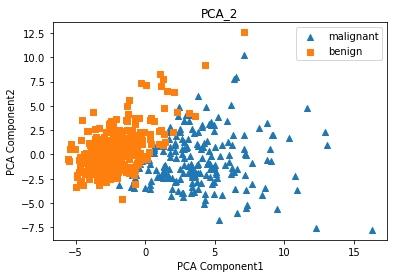

In [ ]:
# 2차원 축소데이터 시각화
markers = ['^','s']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['PCA1']
    y_axis_data = df[df['target']==i]['PCA2']
    plt.scatter(x_axis_data,y_axis_data, marker=marker,label=cancer.target_names[i])
plt.legend()
plt.xlabel('PCA Component1')
plt.ylabel('PCA Component2')
plt.title('PCA_2')
plt.show()

- 군집화

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021)
kmeans.fit(cancer_std)

KMeans(n_clusters=2, random_state=2021)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
df['cluster']=kmeans.labels_
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,PCA1,PCA2,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,9.192837,1.948583,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,2.387802,-3.768172,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,5.733896,-1.075174,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,7.122953,10.275589,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,3.935302,-1.948072,0


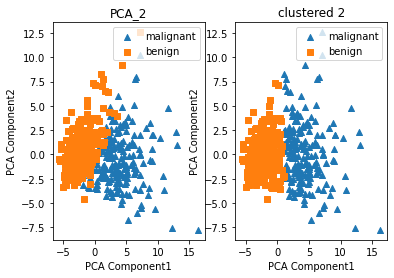

In [ ]:
markers = ['^','s']


plt.subplot(121)
for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['PCA1']
    y_axis_data = df[df['target']==i]['PCA2']
    plt.scatter(x_axis_data,y_axis_data, marker=marker,label=cancer.target_names[i])
plt.legend()
plt.xlabel('PCA Component1')
plt.ylabel('PCA Component2')
plt.title('PCA_2')

plt.subplot(122)
for i, marker in enumerate(markers):
    x_axis_data = df[df['cluster']==i]['PCA1']
    y_axis_data = df[df['cluster']==i]['PCA2']
    plt.scatter(x_axis_data,y_axis_data, marker=marker,label=cancer.target_names[i])
plt.legend()
plt.xlabel('PCA Component1')
plt.ylabel('PCA Component2')
plt.title('clustered 2')
plt.show()

- 실루엣 분석

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
samples=silhouette_samples(cancer_std, df.cluster)
df['실루엣 분석'] = samples 
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,PCA1,PCA2,cluster,실루엣 분석
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.66560,0.7119,0.2654,0.4601,0.11890,0,9.192837,1.948583,0,0.296634
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.18660,0.2416,0.1860,0.2750,0.08902,0,2.387802,-3.768172,0,0.041947
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.42450,0.4504,0.2430,0.3613,0.08758,0,5.733896,-1.075174,0,0.341336
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.86630,0.6869,0.2575,0.6638,0.17300,0,7.122953,10.275589,0,0.143625
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.20500,0.4000,0.1625,0.2364,0.07678,0,3.935302,-1.948072,0,0.166490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.21130,0.4107,0.2216,0.2060,0.07115,0,6.439315,-3.576817,0,0.267008
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.19220,0.3215,0.1628,0.2572,0.06637,0,3.793382,-3.584048,0,0.147894
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.30940,0.3403,0.1418,0.2218,0.07820,0,1.256179,-1.902297,0,-0.129597
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.86810,0.9387,0.2650,0.4087,0.12400,0,10.374794,1.672010,0,0.338948


In [ ]:
df.groupby('target')['실루엣 분석'].mean()

target
0    0.180951
1    0.439840
Name: 실루엣 분석, dtype: float64

In [ ]:
silhouette_score(cancer_std,df.cluster)

0.3433822406907781

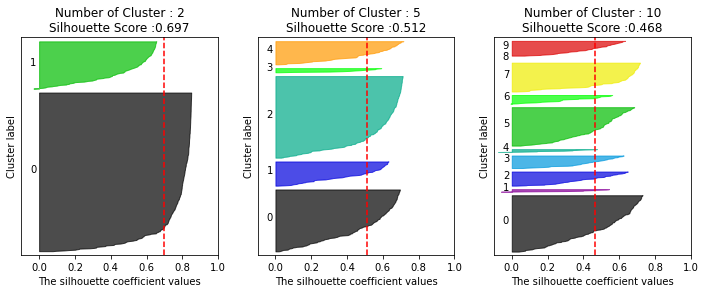

In [ ]:
from visualize import visualize_silhouette
visualize_silhouette([2,5,10], cancer.data)